In [1]:
#https://github.com/r7sy/IntrusionDetection/blob/master/Improving%20Network%20Intrusion%20Detection%20using%20a%20Denoising%20Autoencoder%20with%20Dropout.ipynb
#https://www.kaggle.com/ppicheta/anomaly-detection-with-autoencoders
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


# Loading the data

In [2]:
#loading data
df1 = pd.read_csv(r"D:\feature selection\datasets\insdn\Normal_data.csv")
df2 = pd.read_csv(r"D:\feature selection\datasets\insdn\OVS.csv")
df3 = pd.read_csv(r"D:\feature selection\datasets\insdn\metasploitable-2.csv")

In [3]:
df=pd.concat([df1,df2,df3])

In [4]:
del df1,df2,df3

In [5]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [6]:
df.groupby('Label').first()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BFA,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,4045,2,5,...,1,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
BOTNET,192.168.20.132-200.175.2.130-43062-8081-6,192.168.20.132,43062,200.175.2.130,8081,6,31/12/2019 02:03:01 PM,20356,4,4,...,1,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DDoS,192.168.3.130-6.234.132.122-0-0-0,6.234.132.122,0,192.168.3.130,0,0,10/1/2020 5:56,22,0,2,...,0,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DDoS,192.168.20.134-122.37.162.153-0-0-0,122.37.162.153,0,192.168.20.134,0,0,4/2/2020 15:20,1,0,2,...,0,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS,192.168.20.134-200.175.2.130-80-37766-6,200.175.2.130,37766,192.168.20.134,80,6,1/1/2020 23:19,10020,2,6,...,1,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Normal,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,41,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Probe,172.17.0.2-200.175.2.130-3306-37211-6,200.175.2.130,37211,172.17.0.2,3306,6,26/12/2019 02:29:24 PM,14,0,2,...,0,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
U2R,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10/1/2020 5:02,269709,4,5,...,2,0,0.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Web-Attack,172.17.0.1-200.175.2.130-80-47278-6,200.175.2.130,47278,172.17.0.1,80,6,25/12/2019 10:09:32 PM,40823967,6,7,...,1,0,411.25,726.53854,1501.0,40.0,10200000.0,69107.71531,10200000.0,10100000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343889 entries, 0 to 136742
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

In [8]:
len(df.columns)

84

In [9]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)


In [10]:
# drop nan and infinite rows
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [11]:
#missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
if(miss.sum()==0.0):
    print(miss)

else:
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)
    miss
    print('missing values are'.format(miss))

Flow ID      0.0
Src IP       0.0
Src Port     0.0
Dst IP       0.0
Dst Port     0.0
            ... 
Idle Mean    0.0
Idle Std     0.0
Idle Max     0.0
Idle Min     0.0
Label        0.0
Length: 84, dtype: float64


In [12]:
df.shape

(343889, 84)

In [13]:
df_outcomes=df['Label'].unique()
print("The training set has {} possible outcomes \n".format(len(df_outcomes)) )
print(", ".join(df_outcomes)+".")
print(df_outcomes)

The training set has 9 possible outcomes 

Normal, BFA, DDoS , DoS, Probe, Web-Attack, BOTNET, U2R, DDoS.
['Normal' 'BFA' 'DDoS ' 'DoS' 'Probe' 'Web-Attack' 'BOTNET' 'U2R' 'DDoS']


# Preprocessing

In [14]:
attacks=['BFA','DDoS ','DoS','Probe','Web-Attack','BOTNET','U2R','DDoS']
#nonattack=['BENIGN']
# Our new labels
classes=["Normal","Abnormal"]

#Helper function to label samples to 5 classes
def label_attack (row):
    if row[df.columns[[83]].any()] in attacks:
        return classes[1]
    return classes[0]


#We combine the datasets temporarily to do the labeling 

df["Class"]=df.apply(label_attack,axis=1)

df.drop('Label', axis = 1)
# The old outcome field is dropped since it was replaced with the Class field, the difficulty field will be dropped as well.
#df=df.drop(' Label',axis=1)
#df=df.drop("difficulty",axis=1)

# we again split the data into training and test sets.
#df= df.iloc[:-test_samples_length, :]

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136738,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
136739,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
136740,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal
136741,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abnormal


In [15]:
df.shape

(343889, 85)

In [16]:
df["Class"].to_csv('label.csv', index=None)
df.shape

(343889, 85)

In [17]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal


In [18]:
training_outcomes=df["Class"].unique()
print("The training set has {} possible outcomes \n".format(len(training_outcomes)) )
print(", ".join(training_outcomes)+".")

The training set has 2 possible outcomes 

Normal, Abnormal.


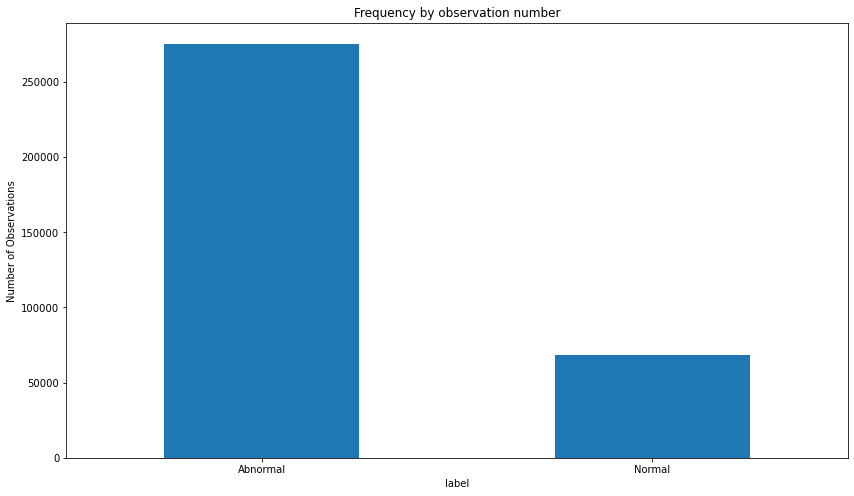

In [19]:
#Balance of Data Visualization
import matplotlib.pyplot as plt
LABELS = ["Abnormal","Normal"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(14, 8))
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("label")
plt.ylabel("Number of Observations");

In [20]:
# No of null values in dataset
df.isnull().values.sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343889 entries, 0 to 136742
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

In [22]:
#Summary Statistics of the Data
normal_df = df[df['Class']=="Normal"]
abnormal_df = df[df['Class']=="Abnormal"]

In [23]:
normal_df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,68424.000000,68424.000000,68424.000000,6.842400e+04,68424.000000,68424.000000,6.842400e+04,6.842400e+04,68424.000000,68424.000000,...,68424.000000,68424.0,6.842400e+04,6.842400e+04,6.842400e+04,6.842400e+04,6.842400e+04,6.842400e+04,6.842400e+04,6.842400e+04
mean,37361.032459,9733.738557,11.418947,1.362636e+07,11.807217,18.592628,3.354497e+03,4.128116e+04,425.863644,22.297469,...,3.891266,0.0,1.887697e+05,1.434025e+05,3.980718e+05,8.563484e+04,4.508770e+06,6.041184e+05,5.066966e+06,3.975015e+06
std,20305.851419,19352.308798,5.551915,3.360107e+07,112.712183,235.949827,1.560998e+05,7.680108e+05,1425.400448,67.228213,...,57.082340,0.0,1.373001e+06,1.105629e+06,2.467808e+06,1.027435e+06,1.314630e+07,3.486207e+06,1.448106e+07,1.246315e+07
min,0.000000,0.000000,0.000000,-1.540000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,34213.500000,53.000000,6.000000,3.134000e+03,1.000000,2.000000,3.000000e+01,1.370000e+02,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,43383.000000,443.000000,6.000000,4.799000e+03,1.000000,3.000000,3.600000e+01,5.020000e+02,36.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,52105.250000,443.000000,17.000000,7.122470e+05,6.000000,5.000000,5.990000e+02,7.620000e+02,249.000000,34.000000,...,3.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65513.000000,60998.000000,17.000000,1.200000e+08,16928.000000,34094.000000,3.160000e+07,1.070000e+08,64239.000000,3900.000000,...,11180.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.190000e+08,7.300000e+07,1.190000e+08,1.190000e+08


In [24]:
normal_df.shape

(68424, 85)

In [25]:
abnormal_df.shape

(275465, 85)

In [26]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal


In [27]:
to_drop = ['Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'PSH Flag Cnt', 'URG Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','Label']

print(to_drop)

# Drop features
df = df.drop(to_drop, axis = 1)
df.shape

['Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'PSH Flag Cnt', 'URG Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']


(343889, 48)

#Encoding categorical attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df.select_dtypes(include=['object']).copy()


# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)


# separate target column from encoded data 
enctrain = traincat.drop(['Class'], axis=1)
cat_Ytrain = traincat[['Class']].copy()

In [28]:
df['Flow ID'] = df['Flow ID'].str.split('.').str.join('')
df['Flow ID'] = df['Flow ID'].str.split('-').str.join('')
df['Flow ID'] = df['Flow ID'].astype(float) 

In [29]:
df['Src IP'] = df['Src IP'].str.split('.').str.join('')
df['Src IP'] = df['Src IP'].astype(float) 

In [30]:
df['Dst IP'] = df['Dst IP'].str.split('.').str.join('')
df['Dst IP'] = df['Dst IP'].astype(float) 

In [31]:
df['Timestamp'] = df['Timestamp'].str.split('/').str.join('')
df['Timestamp'] = df['Timestamp'].str.split(':').str.join('')
df['Timestamp'] = df['Timestamp'].str.split(' ').str.join('')
df['Timestamp'] = df['Timestamp'].str.split('P').str.join('')
df['Timestamp'] = df['Timestamp'].str.split('M').str.join('')
#df['Timestamp'] = df['Timestamp'].astype(float) 

In [32]:
from sklearn.preprocessing import MinMaxScaler
# Helper function for scaling continous values
#df.drop(' Label', axis = 1)
def minmax_scale_values(df, col_name):
    scaler = MinMaxScaler()
    scaler = scaler.fit(df[col_name].values.reshape(-1, 1))
    train_values_standardized = scaler.transform(df[col_name].values.reshape(-1, 1))
    df[col_name] = train_values_standardized
       
    
#Helper function for one hot encoding
def encode_text(df, name):
    training_set_dummies = pd.get_dummies(df[name])
    for x in training_set_dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = training_set_dummies[x]
    df.drop(name, axis=1, inplace=True)
             
sympolic_columns=["Label"]
label_column="Class"
for column in df.columns :
    if column in sympolic_columns:
        df.drop('Label', axis = 1)
    elif not column == label_column:
        minmax_scale_values(df,column)

In [33]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Class
0,0.009634,0.007253,0.006762,0.080319,0.820444,0.352941,0.000135,0.002045,0.000048,0.001144,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,Normal
1,0.009634,0.075285,0.818859,0.007738,0.006775,0.352941,0.000135,0.013380,0.000117,0.004341,...,0.0,0.0,0.0,0.0,0.0,0.980240,0.0,0.0,0.0,Normal
2,0.000100,0.075285,0.535853,0.000803,0.000811,0.352941,0.000135,0.000444,0.000005,0.000117,...,0.0,0.0,0.0,0.0,0.0,0.980240,0.0,0.0,0.0,Normal
3,0.000100,0.000753,0.000809,0.080319,0.536910,0.352941,0.000135,0.000059,0.000001,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.980225,0.0,0.0,0.0,Normal
4,0.008045,0.075285,0.929516,0.006461,0.006775,0.352941,0.000135,0.001586,0.000014,0.000440,...,0.0,0.0,0.0,0.0,0.0,0.980240,0.0,0.0,0.0,Normal


In [34]:
x,y=df,df.pop("Class").values
x=x.values
y0=np.ones(len(y),np.int8)
y0[np.where(y==classes[0])]=0


In [35]:
x.shape

(343889, 47)

In [36]:
y.shape

(343889,)

# The Model Architecture and Training

In [37]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

In [38]:
from keras.layers import Input,Dropout,Dense
from keras.models import Model
from keras import regularizers
from keras.utils.data_utils import get_file
%matplotlib inline
#Buildling and training the model

def getModel():
    inp = Input(shape=(x.shape[1],))
    d1=Dropout(0.5)(inp)
    encoded = Dense(30, activation='relu', activity_regularizer=regularizers.l2(10e-5))(d1)
    decoded = Dense(x.shape[1], activation='relu')(encoded)
    autoencoder = Model(inp, decoded)
    autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
    return autoencoder

autoencoder=getModel()
#print(autoencoder.layers[0].get_weights())

history=autoencoder.fit(x,x,
               epochs=10,
                batch_size=100,
                shuffle=True,
                #validation_split=0.1
                       )

Epoch 1/10
343889/343889 [==============================] - 23s 66us/step - loss: 0.0118 - accuracy: 0.3883
Epoch 2/10
343889/343889 [==============================] - 25s 72us/step - loss: 0.0082 - accuracy: 0.5154
Epoch 3/10
343889/343889 [==============================] - 25s 72us/step - loss: 0.0073 - accuracy: 0.53680s - loss: 0
Epoch 4/10
343889/343889 [==============================] - 24s 70us/step - loss: 0.0069 - accuracy: 0.56270s - loss: 0.0069 - accuracy - ETA: 0s - loss: 0
Epoch 5/10
343889/343889 [==============================] - 25s 74us/step - loss: 0.0066 - accuracy: 0.5834
Epoch 6/10
343889/343889 [==============================] - 22s 65us/step - loss: 0.0064 - accuracy: 0.5915
Epoch 7/10
343889/343889 [==============================] - 22s 65us/step - loss: 0.0063 - accuracy: 0.5952
Epoch 8/10
343889/343889 [==============================] - 22s 64us/step - loss: 0.0061 - accuracy: 0.5967
Epoch 9/10
343889/343889 [==============================] - 21s 60us/step - 

In [39]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 47)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1440      
_________________________________________________________________
dense_2 (Dense)              (None, 47)                1457      
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [40]:
x.shape

(343889, 47)

In [41]:
y0.shape

(343889,)

history=autoencoder.fit(x[np.where(y0==0)],x[np.where(y0==0)],
               epochs=10,
                batch_size=100,
                shuffle=True,
                #validation_split=0.1
                       )

In [42]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

0h 12m 19s


In [43]:
#weights=autoencoder.layers[0].get_weights()
print(autoencoder.layers[2].get_weights())
#print(autoencoder.layers[2].get_activations())

[array([[-6.1751109e-01, -1.7952323e-02,  5.5798266e-02, ...,
        -1.1324996e-01, -8.6298237e+00, -3.4965541e-02],
       [-2.5827596e-02, -1.9195965e-02,  3.1162448e-02, ...,
        -5.1386517e-02, -2.7248386e-01, -1.3727794e-02],
       [ 5.2527064e-03,  5.3642867e-03,  7.9169739e-03, ...,
         4.2025708e-03, -7.9647176e-02, -2.7636031e-03],
       ...,
       [ 5.8215082e-02,  9.3274802e-02, -1.1452067e-01, ...,
        -1.0476600e-01,  8.3239019e-02, -2.7411929e-01],
       [-1.3842293e+00,  1.9277182e-01, -3.7469249e+00, ...,
         2.2301188e-02, -2.9920480e+00, -1.8086345e-01],
       [-4.6828860e-01, -1.4728570e-02, -3.1515446e+00, ...,
        -1.0219086e+00, -2.7434008e+00, -1.7473256e-02]], dtype=float32), array([ 0.02809385,  0.02859497,  0.01415566, -0.11190464, -0.25872663,
       -0.04229388,  0.01638548, -0.36854607,  0.04090543, -0.22704077,
        0.04366676, -0.02848116, -0.00849677, -0.01083324,  0.01821466,
        0.03533119,  0.02569625,  0.048342  , 

In [44]:
#https://itnspotlight.com/dissecting-keras-neural-networks-accessing-weights-and-hidden-layers/
import numpy as np
import keras
hidden_layers = keras.backend.function(
[autoencoder.layers[1].input],  # we will feed the function with the input of the first layer  
[autoencoder.layers[2].output,] # we want to get the output of the first layer
)
h=hidden_layers([x])
print(h)
print(np.shape(h))

[array([[0.        , 0.00696201, 0.05562538, ..., 0.02163151, 0.        ,
        0.        ],
       [0.        , 0.05218774, 0.        , ..., 0.05746076, 0.        ,
        0.        ],
       [0.        , 0.048416  , 0.01463063, ..., 0.05959917, 0.        ,
        0.        ],
       ...,
       [0.        , 0.04758385, 0.        , ..., 0.02178034, 0.        ,
        0.        ],
       [0.        , 0.04297537, 0.0179605 , ..., 0.02306145, 0.        ,
        0.        ],
       [0.        , 0.04319027, 0.01446585, ..., 0.02314047, 0.        ,
        0.        ]], dtype=float32)]
(1, 343889, 30)


In [46]:
h=np.array(h)  

arr_reshaped = np.array(h).reshape(343889, 30) 

In [47]:
arr_reshaped.shape

(343889, 30)

In [48]:
df = pd.DataFrame(arr_reshaped)

In [49]:
df.to_csv('file3.csv', index=False)

In [50]:
#To check 1st row
print(h[:,1,:])

[[0.         0.05218774 0.         0.         0.         0.
  0.0478447  0.         0.         0.         0.04715544 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.05746076 0.         0.        ]]


In [51]:
# importing pandas module 
import pandas as pd 
  
# making data frame from csv file 
data = pd.read_csv("file3.csv") 
  
  
# changing cols with rename() 
new_data = data.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8"}) 
  
# changing columns using .columns() 
data.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                'Feature9', 'Feature10', 'Feature11', 'Feature12', 
                'Feature13', 'Feature14', 'Feature15', 'Feature16', 
                'Feature17', 'Feature18', 'Feature19', 'Feature20',
               'Feature21', 'Feature22', 'Feature23', 'Feature24',
               'Feature25', 'Feature26', 'Feature27', 'Feature28',
               'Feature29', 'Feature30'] 
 
  
data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30
0,0.0,0.006962,0.055625,0.0,0.0,0.0,0.036116,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000318,0.0,0.0,0.0,0.021632,0.0,0.000000
1,0.0,0.052188,0.000000,0.0,0.0,0.0,0.047845,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.057461,0.0,0.000000
2,0.0,0.048416,0.014631,0.0,0.0,0.0,0.045899,0.0,0.000000,0.0,...,0.000978,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059599,0.0,0.000000
3,0.0,0.000000,0.038806,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.027111,0.000000,0.0,0.0,0.0,0.044531,0.0,0.013936
4,0.0,0.051723,0.013089,0.0,0.0,0.0,0.047847,0.0,0.000000,0.0,...,0.005361,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060423,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343884,0.0,0.042979,0.017961,0.0,0.0,0.0,0.021095,0.0,0.043641,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023048,0.0,0.000000
343885,0.0,0.043248,0.014465,0.0,0.0,0.0,0.021635,0.0,0.043689,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023150,0.0,0.000000
343886,0.0,0.047584,0.000000,0.0,0.0,0.0,0.028686,0.0,0.035927,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.021780,0.0,0.000000
343887,0.0,0.042975,0.017960,0.0,0.0,0.0,0.021132,0.0,0.043612,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023061,0.0,0.000000


In [52]:
data.to_csv("assignattributename_file3.csv", index=None)

In [53]:
# Pandas Dataframe 
df = pd.read_csv('label.csv') 
'''  
# Number of rows to drop 
n = 311029
  
# Removing last n rows 
df_dropped_last_n = df.iloc[:-n] 
  
# Printing dataframe 
print(df_dropped_last_n)
df_dropped_last_n.to_csv('label.csv')
'''

"  \n# Number of rows to drop \nn = 311029\n  \n# Removing last n rows \ndf_dropped_last_n = df.iloc[:-n] \n  \n# Printing dataframe \nprint(df_dropped_last_n)\ndf_dropped_last_n.to_csv('label.csv')\n"

In [54]:
csv_1 = pd.read_csv('assignattributename_file3.csv')
#csv_2 = pd.read_csv('label.csv').drop(['Unnamed: 0'], axis=1)
csv_2 = pd.read_csv('label.csv')

result = pd.concat([csv_1, csv_2], axis=1)
'''
merged_inner = pd.concat(left=csv_1, right=csv_2, left_on='Feature1', right_on='Class')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape
merged_inner

merged = csv_1.merge(csv_2, on='Index')
merged.to_csv('output.csv', sep=',', header=True, index=False)
'''

"\nmerged_inner = pd.concat(left=csv_1, right=csv_2, left_on='Feature1', right_on='Class')\n# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`\n# And `right_on` arguments we would still get the same result\n\n# What's the size of the output data?\nmerged_inner.shape\nmerged_inner\n\nmerged = csv_1.merge(csv_2, on='Index')\nmerged.to_csv('output.csv', sep=',', header=True, index=False)\n"

In [55]:
result

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30,Class
0,0.0,0.006962,0.055625,0.0,0.0,0.0,0.036116,0.0,0.000000,0.0,...,0.0,0.000000,0.000318,0.0,0.0,0.0,0.021632,0.0,0.000000,Normal
1,0.0,0.052188,0.000000,0.0,0.0,0.0,0.047845,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.057461,0.0,0.000000,Normal
2,0.0,0.048416,0.014631,0.0,0.0,0.0,0.045899,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.059599,0.0,0.000000,Normal
3,0.0,0.000000,0.038806,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.027111,0.000000,0.0,0.0,0.0,0.044531,0.0,0.013936,Normal
4,0.0,0.051723,0.013089,0.0,0.0,0.0,0.047847,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.060423,0.0,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343884,0.0,0.042979,0.017961,0.0,0.0,0.0,0.021095,0.0,0.043641,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023048,0.0,0.000000,Abnormal
343885,0.0,0.043248,0.014465,0.0,0.0,0.0,0.021635,0.0,0.043689,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023150,0.0,0.000000,Abnormal
343886,0.0,0.047584,0.000000,0.0,0.0,0.0,0.028686,0.0,0.035927,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.021780,0.0,0.000000,Abnormal
343887,0.0,0.042975,0.017960,0.0,0.0,0.0,0.021132,0.0,0.043612,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023061,0.0,0.000000,Abnormal


In [56]:
result.to_csv("afterdimensionalityreduction", index=None, header=None)
#df = pd.read_csv('withoutattributename_file3.csv') 